<a href="https://colab.research.google.com/github/Meryem12345/Deneme/blob/main/KerasTuner0512_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM
from tensorflow.keras.layers import Dense,Embedding,Activation,Dropout
from tensorflow.python.keras.layers.core import Activation
from keras.layers import Conv1D,MaxPooling1D,GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')
stop_word_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


In [ ]:
dataset = pd.read_excel('sentimentAnalysis.xlsx', sheet_name = 'Sheet1')
dataset

,Text,Sentiment
0,Daha öncede almıştım bu cihazdan ense ve sakal...,1
1,Ürün gayet başarılı sakal kesmede başlık sayıs...,1
2,Daha öncede aynısını almıştım çok güzel ve kal...,1
3,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1
4,ürün gerçekten çok güzel,1
...,...,...
34187,J7 Pro Cihazı Geldi Fakat Faturası Gelmedi!,0
34188,Müşteri Hizmetlerine Ulaşamama Sorunu!,0
34189,Para İadesi Sorunu!,0
34190,Mağdur Ediyor!,0


In [ ]:
dataset['Text'] = dataset['Text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())
dataset['Text'] = dataset['Text'].apply(lambda x: x.strip())

def token(values):
    words = nltk.tokenize.word_tokenize(values)
    filtered_words = [word for word in words if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc

dataset['Text'] = dataset['Text'].apply(lambda x: token(x))

In [ ]:
dataset['Text']

0        öncede almıştım cihazdan ense sakal tüketmek o...
1        ürün gayet başarılı sakal kesmede başlık sayıs...
2         öncede aynısını almıştım güzel kaliteli bir ürün
3        erkek kuaförüyüm ense sıfır sakal traşı uygun ...
4                                     ürün gerçekten güzel
                               ...                        
34187           j7 pro cihazı geldi fakat faturası gelmedi
34188                müşteri hizmetlerine ulaşamama sorunu
34189                                  para i̇adesi sorunu
34190                                        mağdur ediyor
34191               ürünü aldığı halde parayı i̇ade etmedi
Name: Text, Length: 34192, dtype: object

In [ ]:
data = dataset['Text'].values.tolist()
sentiment = dataset['Sentiment'].values.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
train_ratio = 0.56
test_ratio = 0.20
validation_ratio = 0.24
X_train, X_test, y_train, y_test = train_test_split(data,sentiment,test_size=test_ratio, random_state = 42)
X_train, X_valid, y_train, y_valid=train_test_split(X_train,y_train,test_size=validation_ratio/(train_ratio+test_ratio))

In [ ]:
X_train[290]

'ürün kısa sürede elime ulaştıveri aktarımı oldukça hızlıısınma problemi yokyanlız boyut olarak küçük bir bekliyordum'

In [ ]:
y_train[290]

1

In [ ]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data)
tokenizer.word_index

{'bir': 1,
 'ürün': 2,
 'güzel': 3,
 'iyi': 4,
 'tavsiye': 5,
 'gayet': 6,
 'ederim': 7,
 'aldım': 8,
 'yok': 9,
 'geldi': 10,
 'hızlı': 11,
 'değil': 12,
 'göre': 13,
 'ürünü': 14,
 'olarak': 15,
 'var': 16,
 'kaliteli': 17,
 'kadar': 18,
 '0': 19,
 'telefon': 20,
 'uygun': 21,
 'teşekkürler': 22,
 'cok': 23,
 'biraz': 24,
 'ben': 25,
 'kargo': 26,
 'kullanışlı': 27,
 'fiyat': 28,
 'elime': 29,
 '1': 30,
 'küçük': 31,
 'fiyata': 32,
 'bi': 33,
 'gün': 34,
 'kalitesi': 35,
 'kesinlikle': 36,
 'fiyatına': 37,
 'şarj': 38,
 'sonra': 39,
 'gerçekten': 40,
 '3': 41,
 'bile': 42,
 'fakat': 43,
 'tam': 44,
 'memnun': 45,
 'tek': 46,
 'kötü': 47,
 'kullanıyorum': 48,
 'oldu': 49,
 'bence': 50,
 'iade': 51,
 'performans': 52,
 'fazla': 53,
 'ses': 54,
 'olması': 55,
 'ulaştı': 56,
 'ancak': 57,
 'uzun': 58,
 'harika': 59,
 'önce': 60,
 'sorun': 61,
 'sipariş': 62,
 'mükemmel': 63,
 'büyük': 64,
 'fiyatı': 65,
 'ürünün': 66,
 'başarılı': 67,
 'oldukça': 68,
 'aynı': 69,
 'urun': 70,
 'ayrıca': 

In [ ]:

x_train_tokens = tokenizer.texts_to_sequences(X_train)
x_test_tokens = tokenizer.texts_to_sequences(X_test)

In [ ]:
x_train_tokens[290]

[2, 93, 199, 29, 1587, 68, 712, 750, 15, 31, 1, 1881]

In [ ]:
X_train[290]

'ürün kısa sürede elime ulaştıveri aktarımı oldukça hızlıısınma problemi yokyanlız boyut olarak küçük bir bekliyordum'

In [ ]:

num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
np.mean(num_tokens)

13.178797839868514

In [ ]:
np.max(num_tokens)

229

In [ ]:

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

42

In [ ]:

np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9602019253345856

In [ ]:

x_train_pad = np.array(pad_sequences(x_train_tokens, maxlen=max_tokens))
x_test_pad = np.array(pad_sequences(x_test_tokens, maxlen=max_tokens))


In [ ]:
X_train

['kesinlikle ihtiyacı olanlar alsın cok iyi',
 'kullanışlı bir ürün tavsiye ederim',
 'boyutu küçük ses telefon sesi kadar anca fiyatına göre iyi biraz ekleyip iyisini almak mantıklı hayal kırıklığı oldu',
 'elimizden düşmüyor harika',
 'ürün güzel bir ürün değil yerinizde olsam asla almam naylon yırtıldı ilk hafta bitmeden çantanın kulpları kola geçirdiğimiz kısımları zımba zimbalanmış ilk haftadan oda koptu ben iade edicektim fişi yoktu hemde kokuyor makinede yıkadım oyuzden gönderemedim yerinizde olsam almam',
 'paketleme güzelkısa zamanda elime ulaştıürün sorunsuzkurulum kolaygüzel alışveriş',
 'ürün eli biraz büyük olan insanlar ideal gerçekten şık tavsiye ederimhepsiburadacom a teşekkürler',
 'çekme durumunu gösteren bir ışığı olması iyi bir özellik kurulumu basit ben repeater olarak kullandım i̇ki kat arasında aynı hizada anca çekiyor fakat aynı kat içinde dağıtımı iyi ikinden fazla kat varsa kat ayrı bir tane kullanmak gerekebilir',
 'gayet başarılı almanızı tavsiye ederim',
 '

In [ ]:
x_train_pad

array([[   0,    0,    0, ..., 1486,   23,    4],
       [   0,    0,    0, ...,    2,    5,    7],
       [   0,    0,    0, ...,  482,  808,   49],
       ...,
       [   0,    0,    0, ..., 1082,   31,  512],
       [   0,    0,    0, ..., 1223,   10,   22],
       [   0,    0,    0, ...,  708,    6,    3]], dtype=int32)

In [ ]:
np.array(x_train_pad[3027])

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  321, 1561,    4], dtype=int32)

In [ ]:
x_test_pad[2000]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 36,  4], dtype=int32)

In [ ]:

idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))


def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
model =Sequential()

embedding_size = 50


In [ ]:
pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt
from tensorflow import keras

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Embedding, InputLayer, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, GlobalAveragePooling1D
from keras.regularizers import l2
import math
def build_model(hp):
  model = Sequential()
  model.add(InputLayer(input_shape=(2000,)))
  model.add(Embedding(2000,
                      128,
                      input_length = max_tokens))
  model.add(Conv1D(128,
                  3,
                  strides = 1,
                  padding = 'valid',
                  activation = 'relu',
                  input_shape=(128,1,)
                  ))
  model.add(MaxPooling1D(pool_size = 7))

  model.add(GlobalMaxPooling1D())
  model.add(Dense(units = 32,
                  
                  activation =hp.Choice("activation", ["relu", "elu"])))

  model.add(Dense(units = 1,
                  activation = 'sigmoid'))
  learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

  adam = keras.optimizers.Adam(learning_rate)
  optimizer=adam
  loss='binary_crossentropy'
  #metrics = ['accuracy']
  model.compile(optimizer=adam,
                loss='binary_crossentropy',
                metrics = ['accuracy'])
  

  return model

In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu'], 'ordered': False}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05], 'ordered': True}


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN

callback_list = [
                 ModelCheckpoint(
                     filepath = '/content/drive/My Drive/Personal/SentimentAnalysis/best_CNNmodel.hdf5',
                     monitor = 'val_acc',
                     verbose = 1,
                     save_best_only = True,
                     save_weights_only = False,
                     mode = 'max',
                     save_freq = 1
                 ),
                 
                 EarlyStopping(
                    monitor = 'val_acc',
                    patience = 3,
                    verbose = 1,
                    mode = 'max',
                    baseline = 0.5,
                    restore_best_weights = True
                 ),

                 ReduceLROnPlateau(
                     monitor = 'val_loss',
                     factor = 0.2,
                     patience = 5,
                     verbose = 1,
                     mode = 'min',
                     cooldown = 1,
                     min_lr = 0
                 ),

                 TerminateOnNaN()
]

In [ ]:
max_tokens = 2000
x_train_pad = np.array(pad_sequences(x_train_tokens, maxlen=max_tokens))
x_test_pad = np.array(pad_sequences(x_test_tokens, maxlen=max_tokens))


In [ ]:
x_train_tokens[0]

[36, 724, 529, 1486, 23, 4]

In [ ]:
EPOCHS = 5
BATCH = 64
X_train = np.array(X_train)
y_train = np.array(y_train)
#X_train = X_train.reshape((-1))
#y_train=y_train.reshape((-1))
print(x_train_pad[0])


[   0    0    0 ... 1486   23    4]
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/intro_to_kt
Showing 10 best trials
Trial summary
Hyperparameters:
activation: elu
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7995321154594421
Trial summary
Hyperparameters:
activation: relu
learning_rate: 1e-05
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7933908700942993
Trial summary
Hyperparameters:
activation: elu
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0002
Score: 0.7932446002960205
Trial summary
Hyperparameters:
activation: relu
learning_rate: 1e-05
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0000
Score: 0.7932446002960205
Trial summary
Hyperparameters:
activation: elu
learning_rate: 1e-05
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7930983901023865
Trial summary
Hyperparameters:
activation: relu
learning_rate:

In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hp)

In [ ]:
EPOCHS = 5
BATCH = 64

history = model.fit(x_train_pad,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
468/468 [==============================] - 7s 13ms/step - loss: 0.4598 - accuracy: 0.7509 - val_loss: 0.4030 - val_accuracy: 0.8023
Epoch 2/5
468/468 [==============================] - 6s 13ms/step - loss: 0.3376 - accuracy: 0.8249 - val_loss: 0.3908 - val_accuracy: 0.8047
Epoch 3/5
468/468 [==============================] - 6s 13ms/step - loss: 0.2762 - accuracy: 0.8511 - val_loss: 0.4370 - val_accuracy: 0.7999
Epoch 4/5
468/468 [==============================] - 6s 13ms/step - loss: 0.2304 - accuracy: 0.8679 - val_loss: 0.5209 - val_accuracy: 0.7921
Epoch 5/5
468/468 [==============================] - 6s 14ms/step - loss: 0.2041 - accuracy: 0.8793 - val_loss: 0.5570 - val_accuracy: 0.7988


In [ ]:
tuner.search(
    x_train_pad, y_train, batch_size=64, epochs=EPOCHS, validation_data=(x_test_pad, np.array(y_test)), steps_per_epoch = 1714)

INFO:tensorflow:Oracle triggered exit


In [ ]:
model.save("sentiment_model.h5")

In [ ]:

x_test_pad=np.array(x_test_pad)
y_test =np.array(y_test)
result = model.evaluate(x_test_pad, y_test)

214/214 [==============================] - 1s 6ms/step - loss: 0.5578 - accuracy: 0.7801


In [ ]:
result[1]

0.7800847887992859

In [ ]:
y_pred = model.predict(x=x_test_pad[:700])


In [ ]:
y_pred = y_pred.T[0]

In [ ]:
y_pred

array([[3.3137989e-01],
       [5.8044177e-01],
       [2.8219536e-02],
       [5.8044177e-01],
       [5.8044177e-01],
       [9.9999988e-01],
       [1.8569644e-01],
       [6.4322847e-08],
       [9.7747988e-01],
       [5.5734843e-01],
       [9.9979383e-01],
       [5.8044177e-01],
       [1.7072393e-01],
       [6.8895221e-02],
       [1.9001511e-03],
       [5.8044177e-01],
       [3.2618576e-05],
       [5.8044177e-01],
       [9.9917918e-01],
       [9.8126251e-01],
       [9.9999964e-01],
       [6.0118437e-01],
       [9.6934313e-01],
       [5.8044177e-01],
       [9.9909210e-01],
       [8.2363135e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.8044177e-01],
       [9.9998045e-01],
       [6.9751977e-03],
       [5.8044177e-01],
       [9.9070030e-01],
       [9.9946207e-01],
       [2.4474010e-01],
       [9.9708480e-01],
       [7.3180002e-01],
       [5.8044177e-01],
       [9.9998903e-01],
       [5.8044177e-01],
       [5.8044177e-01],
       [5.804417

In [ ]:
text = "kötü"
texts = [text]
tokens = tokenizer.texts_to_sequences(texts)

In [ ]:
tokens_pad = pad_sequences(tokens,maxlen = max_tokens)
tokens_pad.shape

(1, 2000)

In [ ]:
model.predict(tokens_pad).tolist()[0][0]

0.5804417729377747

In [ ]:
classes = np.argmax(int(model.predict(tokens_pad).tolist()[0][0]))
print("moralinizin {} olduğunu görüyorum. ".format(classes))


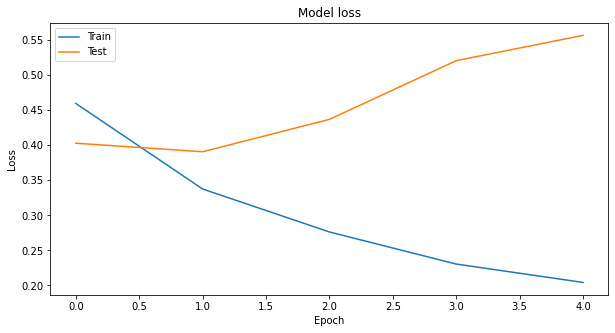

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

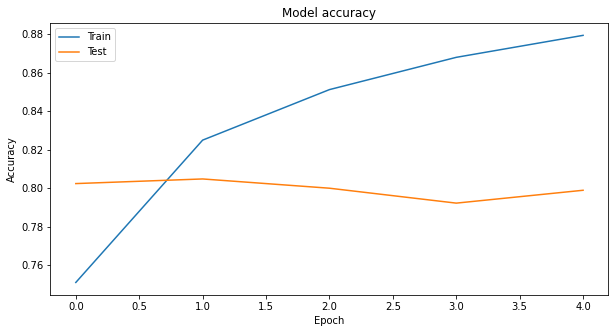

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save("sentiment_model.h5")

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)